In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

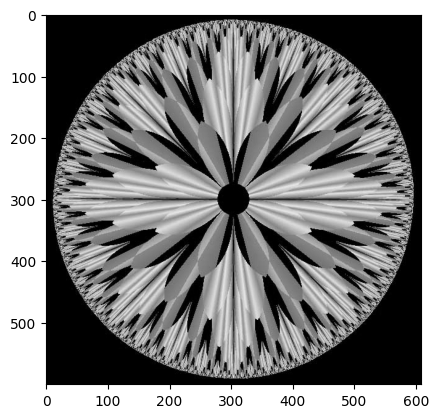

In [58]:
#Original Images
Img4 = cv2.imread('/content/Fig3.13.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(Img4,cmap='gray')

In [59]:
def img2bitmap(img: np.ndarray) -> list:
    if img.dtype != np.uint8 or img.ndim > 2:
        raise ValueError("Image is not uint8 or gray")
    bit_mat = [np.zeros(img.shape, dtype=np.uint8) for _ in range(8)]
    for row_number in range(img.shape[0]):
        for column_number in range(img.shape[1]):
            binary = format(img[row_number][column_number], 'b')
            for idx, bit in enumerate("".join(reversed(binary))[:]):
                bit_mat[idx][row_number, column_number] = 2 ** idx if int(bit) == 1 else 0
    return bit_mat

out = img2bitmap(Img4)


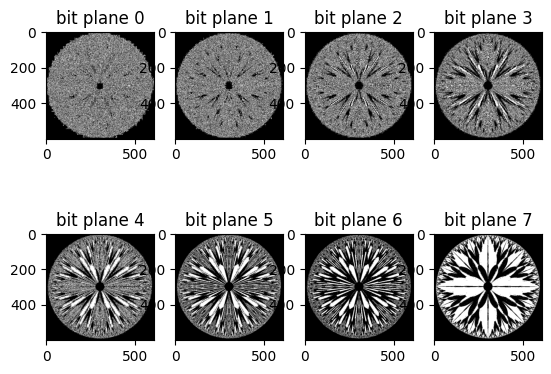

In [61]:
plt.figure(1)
plt.subplot(2, 4, 1)
for i in range(8):
    plt.subplot(2, 4, i + 1)
    # Convert [0 - 255] to [0.0 - 1.0]
    out[i] = cv2.normalize(out[i].astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
    plt.imshow(np.array(out[i]),cmap='gray')
    plt.title(f"bit plane {i}")
plt.show()

In [62]:
"""

regenerating image using 5 most valuable bits

in "for" instead of (3,8) can be (0,8) and it will regenerate image using all bitmaps

"""


#regenerating the Image

OriginalImage = np.zeros(Img4.shape, dtype=np.uint8)
for i in range(OriginalImage.shape[0]):
    for j in range(OriginalImage.shape[1]):
        for data in range(3,8):
            x = np.array([OriginalImage[i, j]], dtype=np.uint8)
            data = np.array([data], dtype=np.uint8)
            flag = np.array([0 if out[data[0]][i, j] == 0 else 1], dtype=np.uint8)
            mask = flag << data[0]
            x[0] = (x[0] & ~mask) | ((flag[0] << data[0]) & mask)
            OriginalImage[i, j] = x[0]

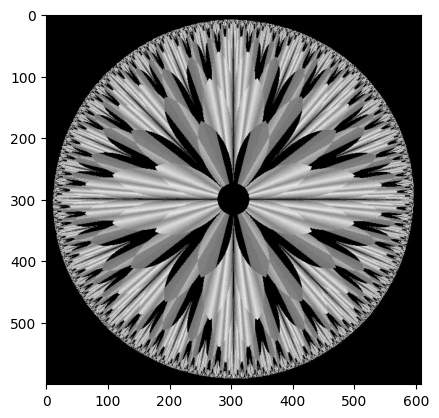

In [64]:
plt.imshow(OriginalImage,cmap='gray')